In [1]:
from sotip import *
import numpy as np
import scanpy as sc


In [3]:
data_path = 'simulation_data/'

data_file = 'simulation2.h5ad'
adata = ad.read_h5ad(data_path+data_file)


In [4]:
sc.pp.subsample(adata,0.844)

In [5]:
adata

AnnData object with n_obs × n_vars = 3996 × 1000
    obs: 'gt_ct', 'region_id', 'batch'
    uns: 'gt_ct_colors', 'region_id_colors'
    obsm: 'X_pca', 'X_phate', 'X_tsne', 'X_umap', 'spatial'

In [6]:
adata.obs['gt_ct'].cat.reorder_categories(['group '+str(i+1) for i in range(5)],inplace=True)

/tmp/ipykernel_29290/3095504374.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['gt_ct'].cat.reorder_categories(['group '+str(i+1) for i in range(5)],inplace=True)


In [7]:
adata.obs['gt_ct']

Cell2566-3    group 3
Cell2357-3    group 4
Cell3998-4    group 5
Cell1780-3    group 5
Cell299-3     group 4
               ...   
Cell3973-4    group 5
Cell2801-2    group 4
Cell4310-1    group 5
Cell4969-0    group 1
Cell1584-0    group 3
Name: gt_ct, Length: 3996, dtype: category
Categories (5, object): ['group 1', 'group 2', 'group 3', 'group 4', 'group 5']

In [8]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# plot

In [26]:
np.unique(adata.obs['gt_ct'],return_counts=1)

(array(['group 1', 'group 2', 'group 3', 'group 4', 'group 5'],
       dtype=object),
 array([803, 826, 789, 792, 786]))

In [14]:
cmp = palettable.cartocolors.qualitative.Pastel_10.mpl_colors

In [15]:
adata.uns['gt_ct_colors'] = cmp

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

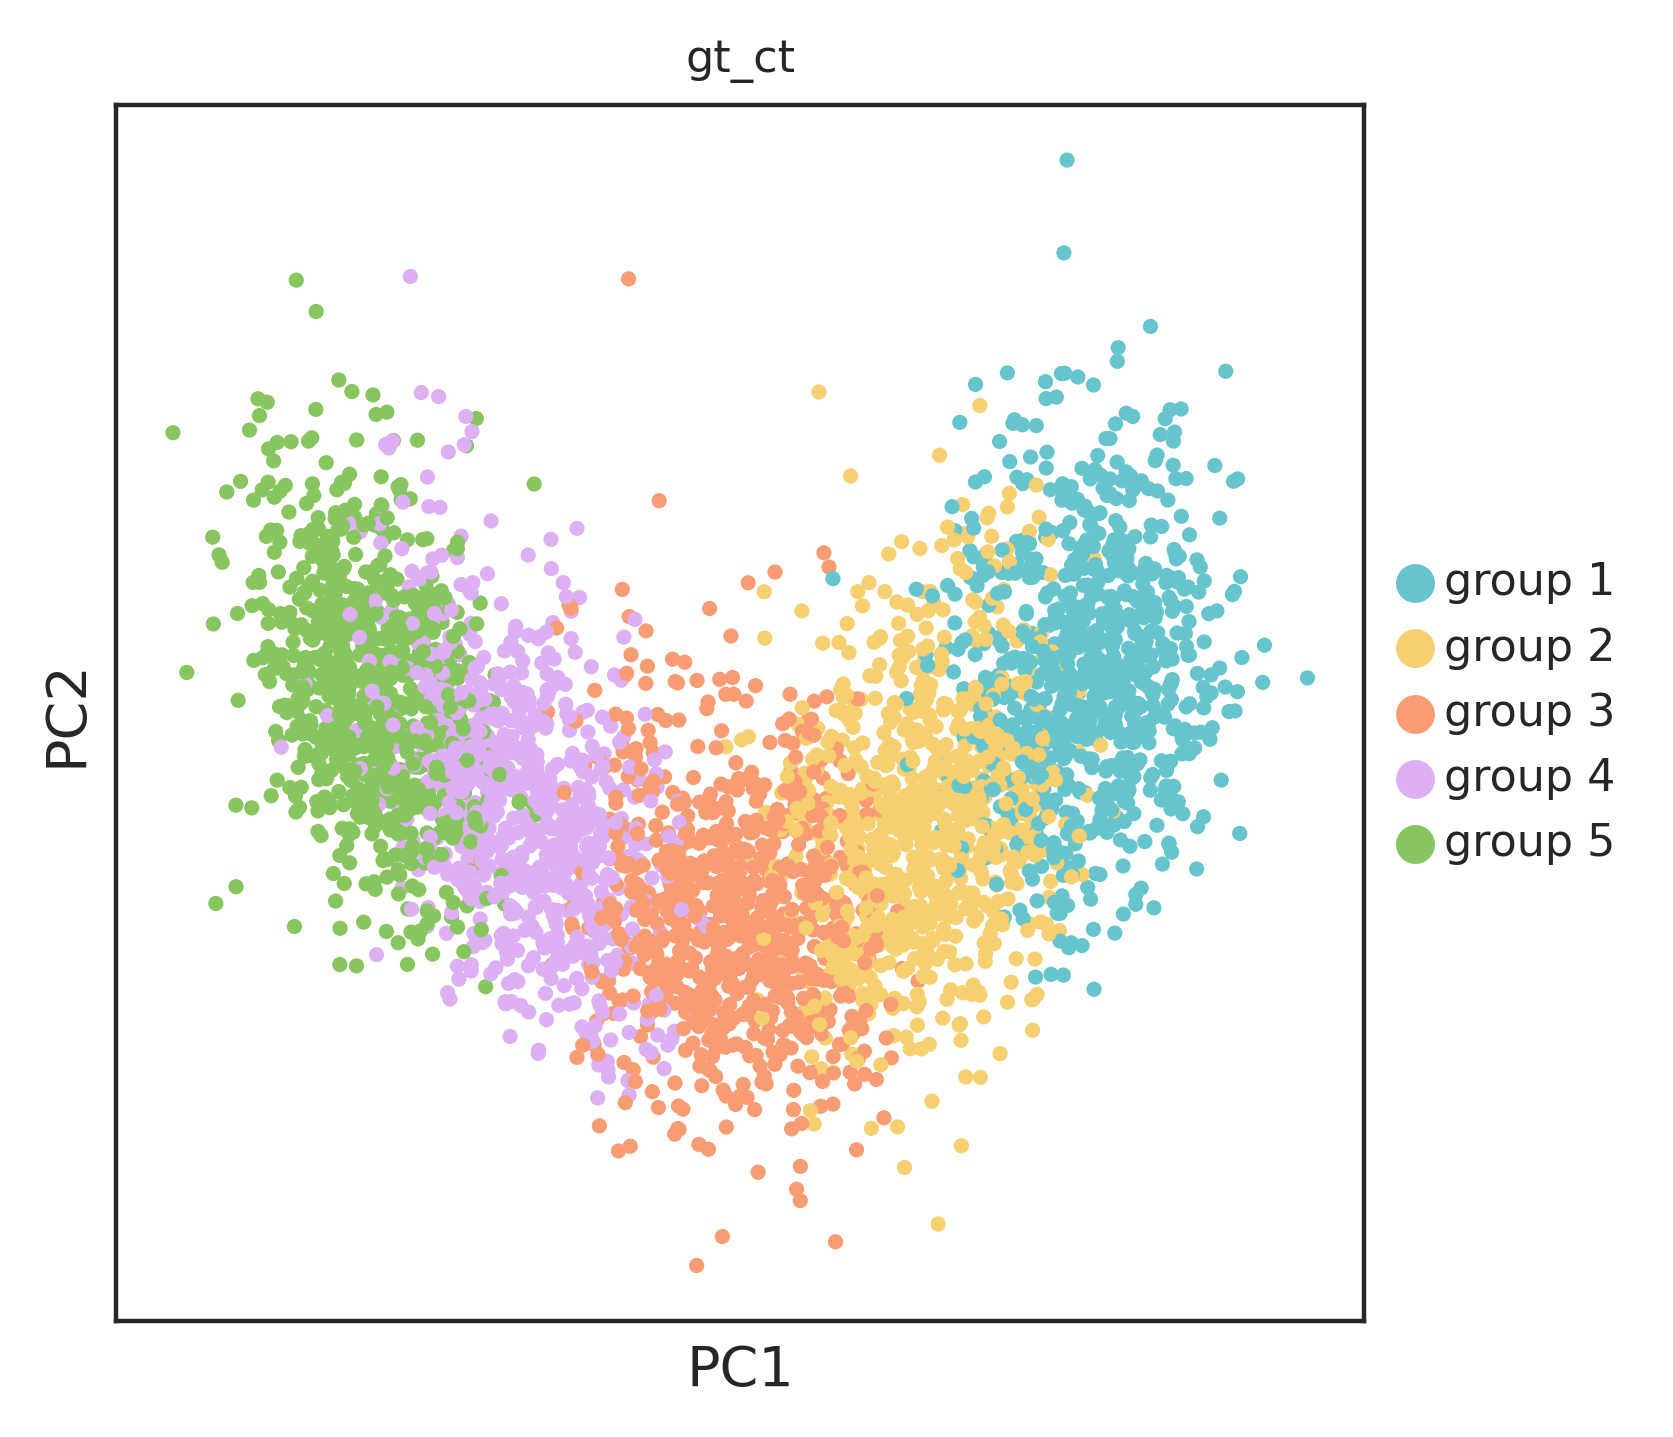

In [16]:
sc.pl.pca(adata,color='gt_ct')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

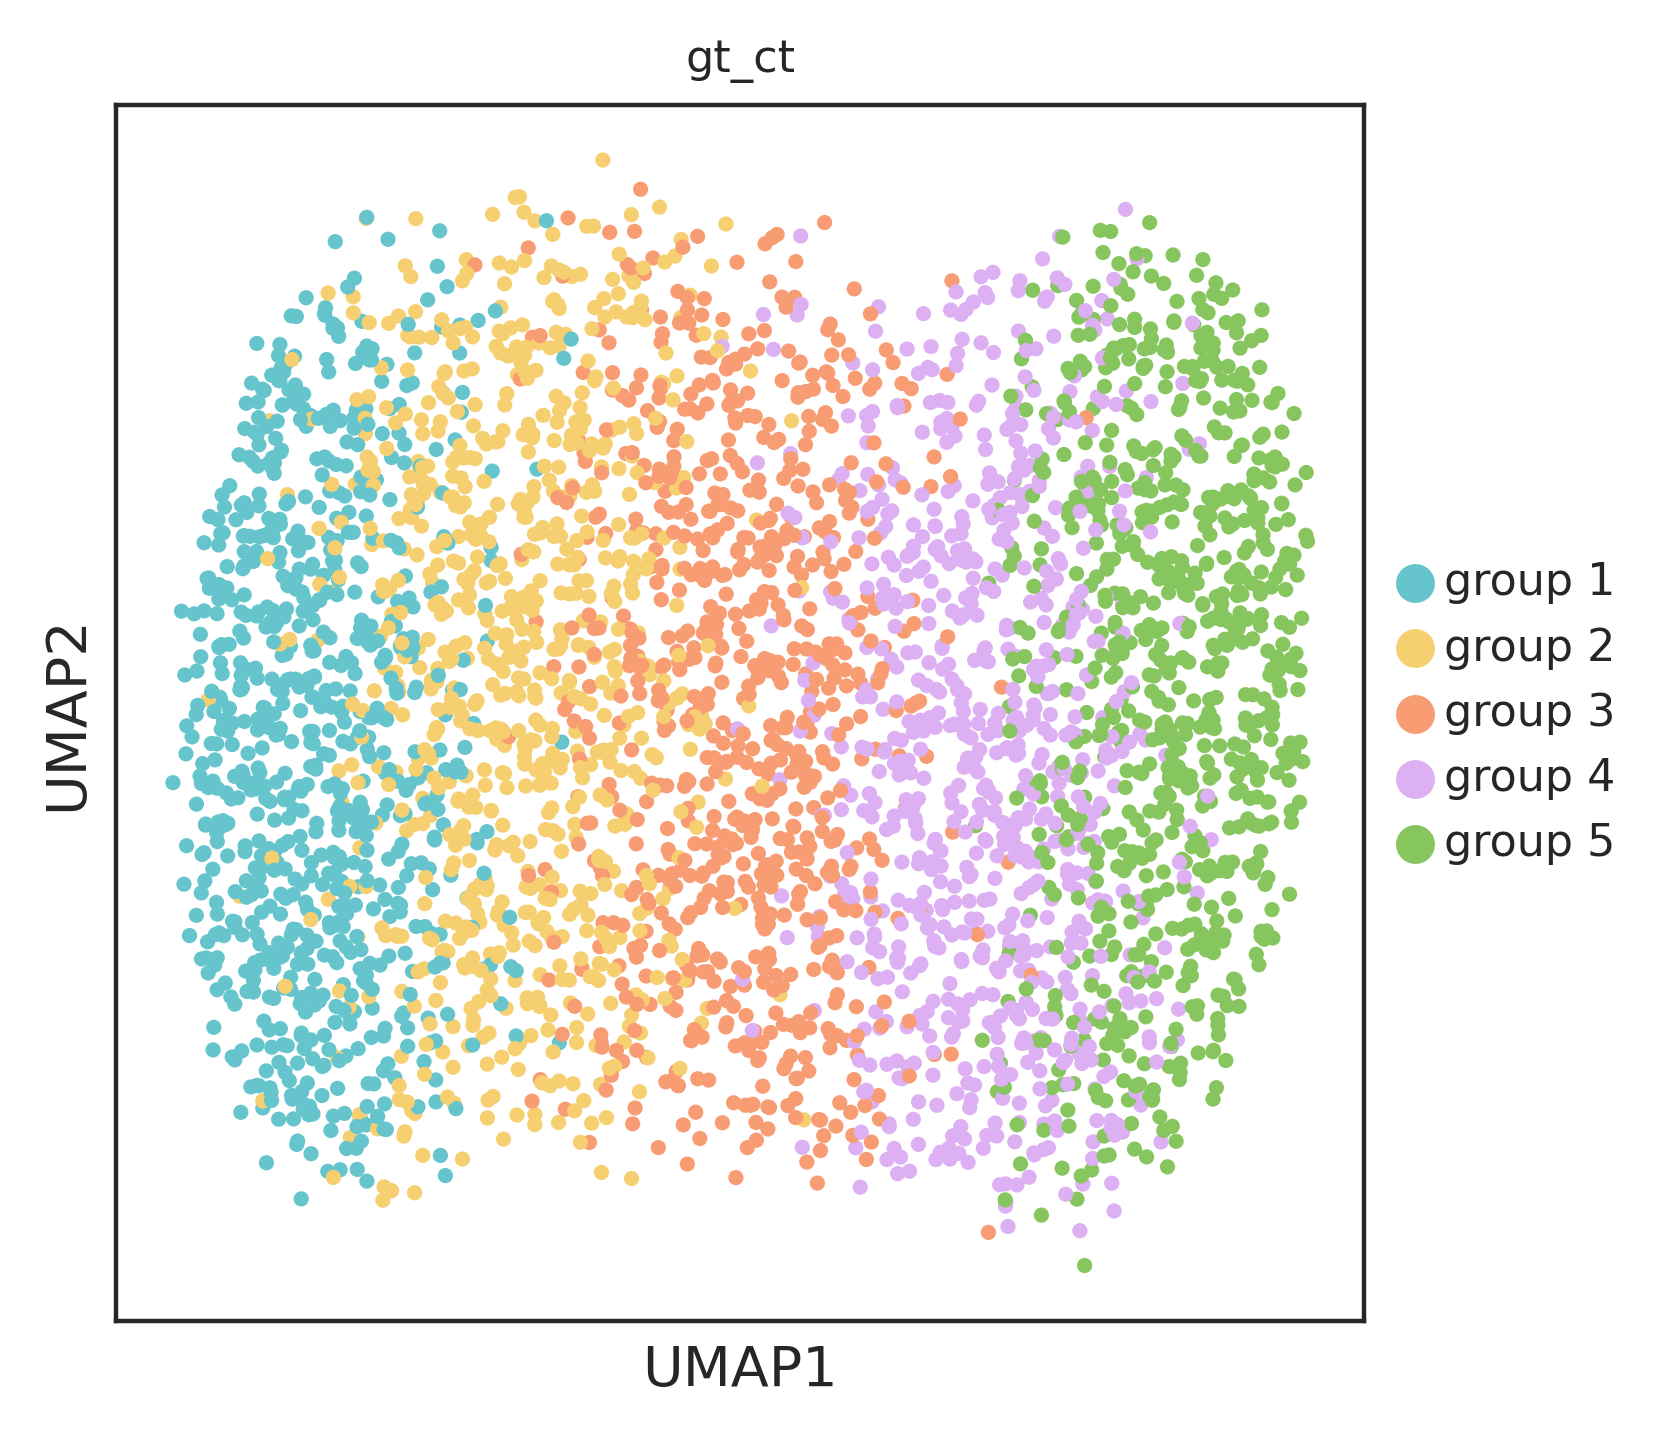

In [17]:
sc.pl.umap(adata,color='gt_ct')

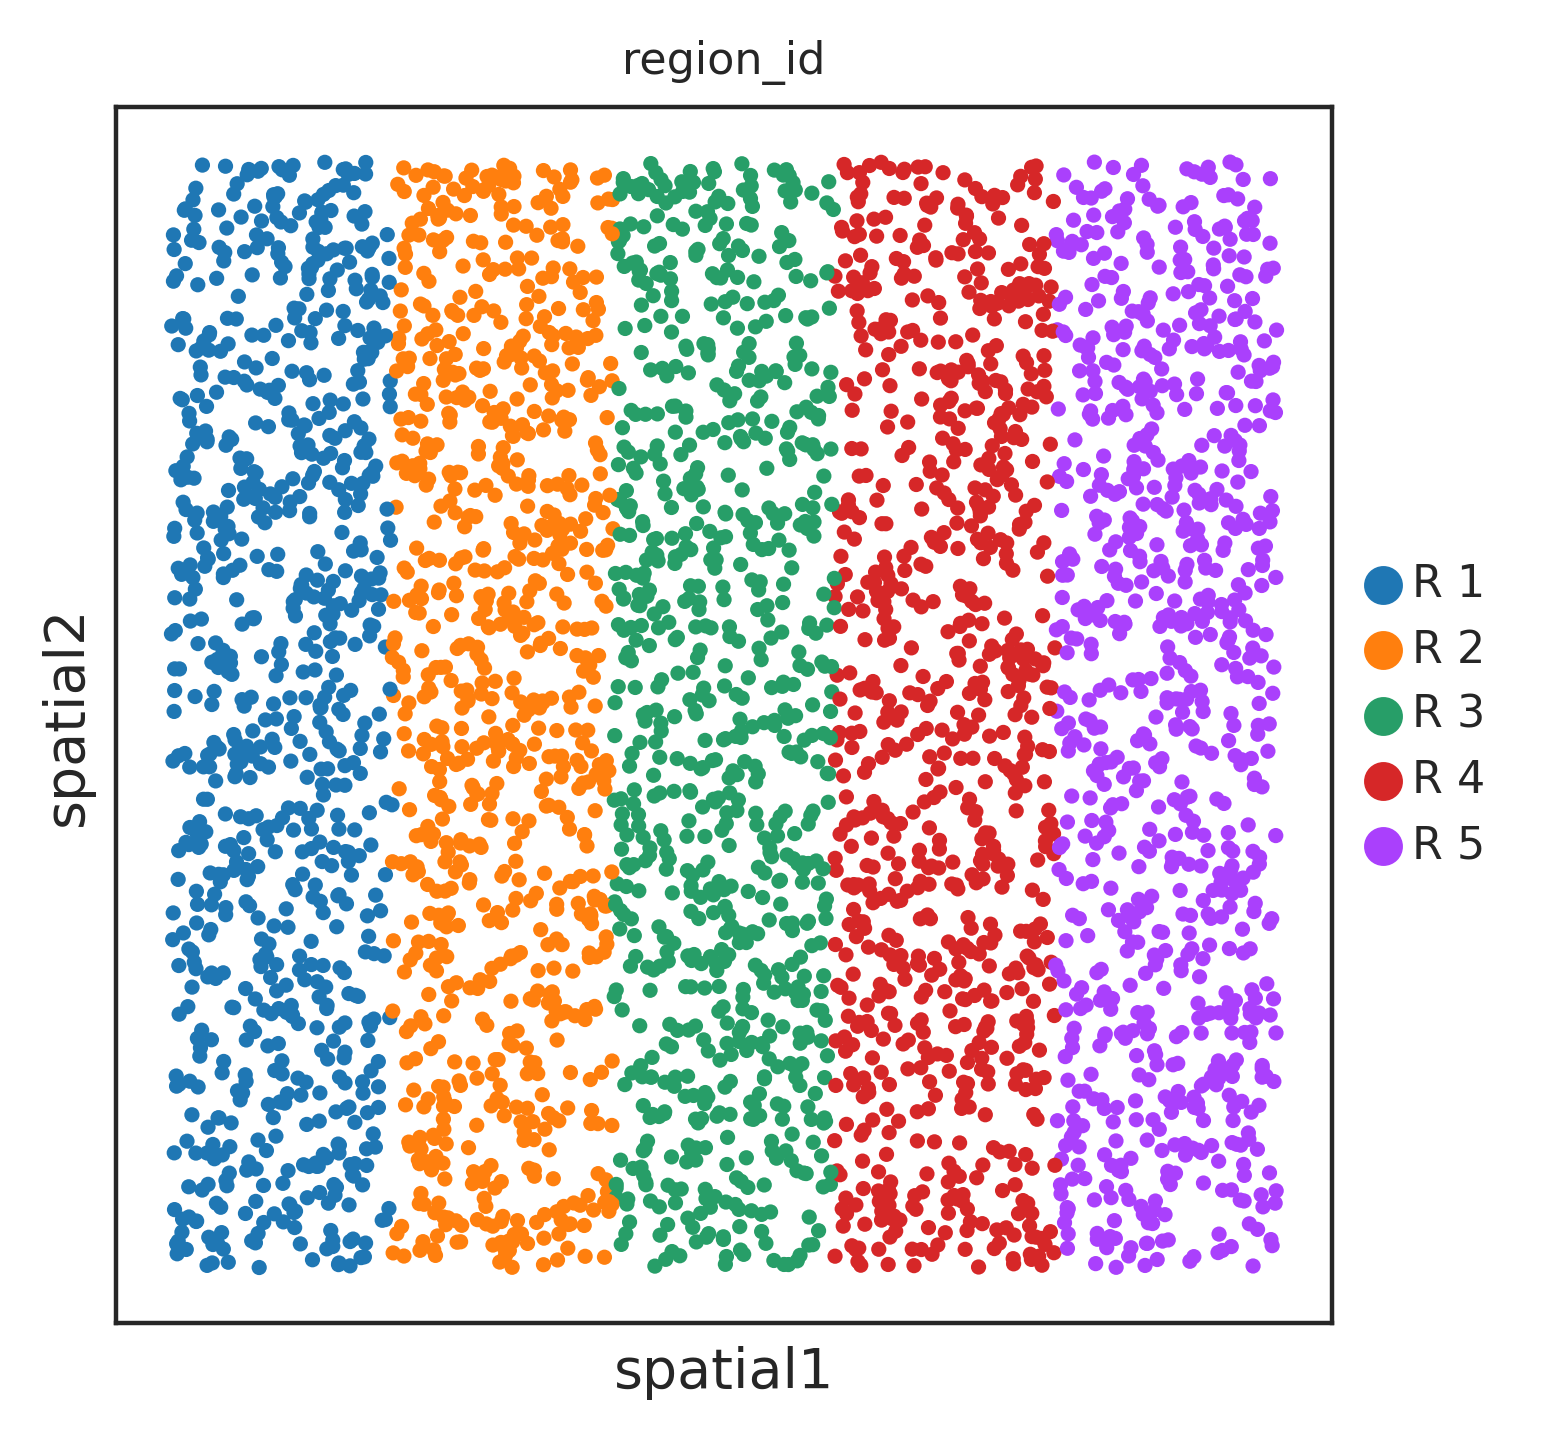

In [10]:
ax = sc.pl.embedding(adata,basis="spatial",color=['region_id'],show=False)
plt.gca().set_aspect('equal', adjustable='box') 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


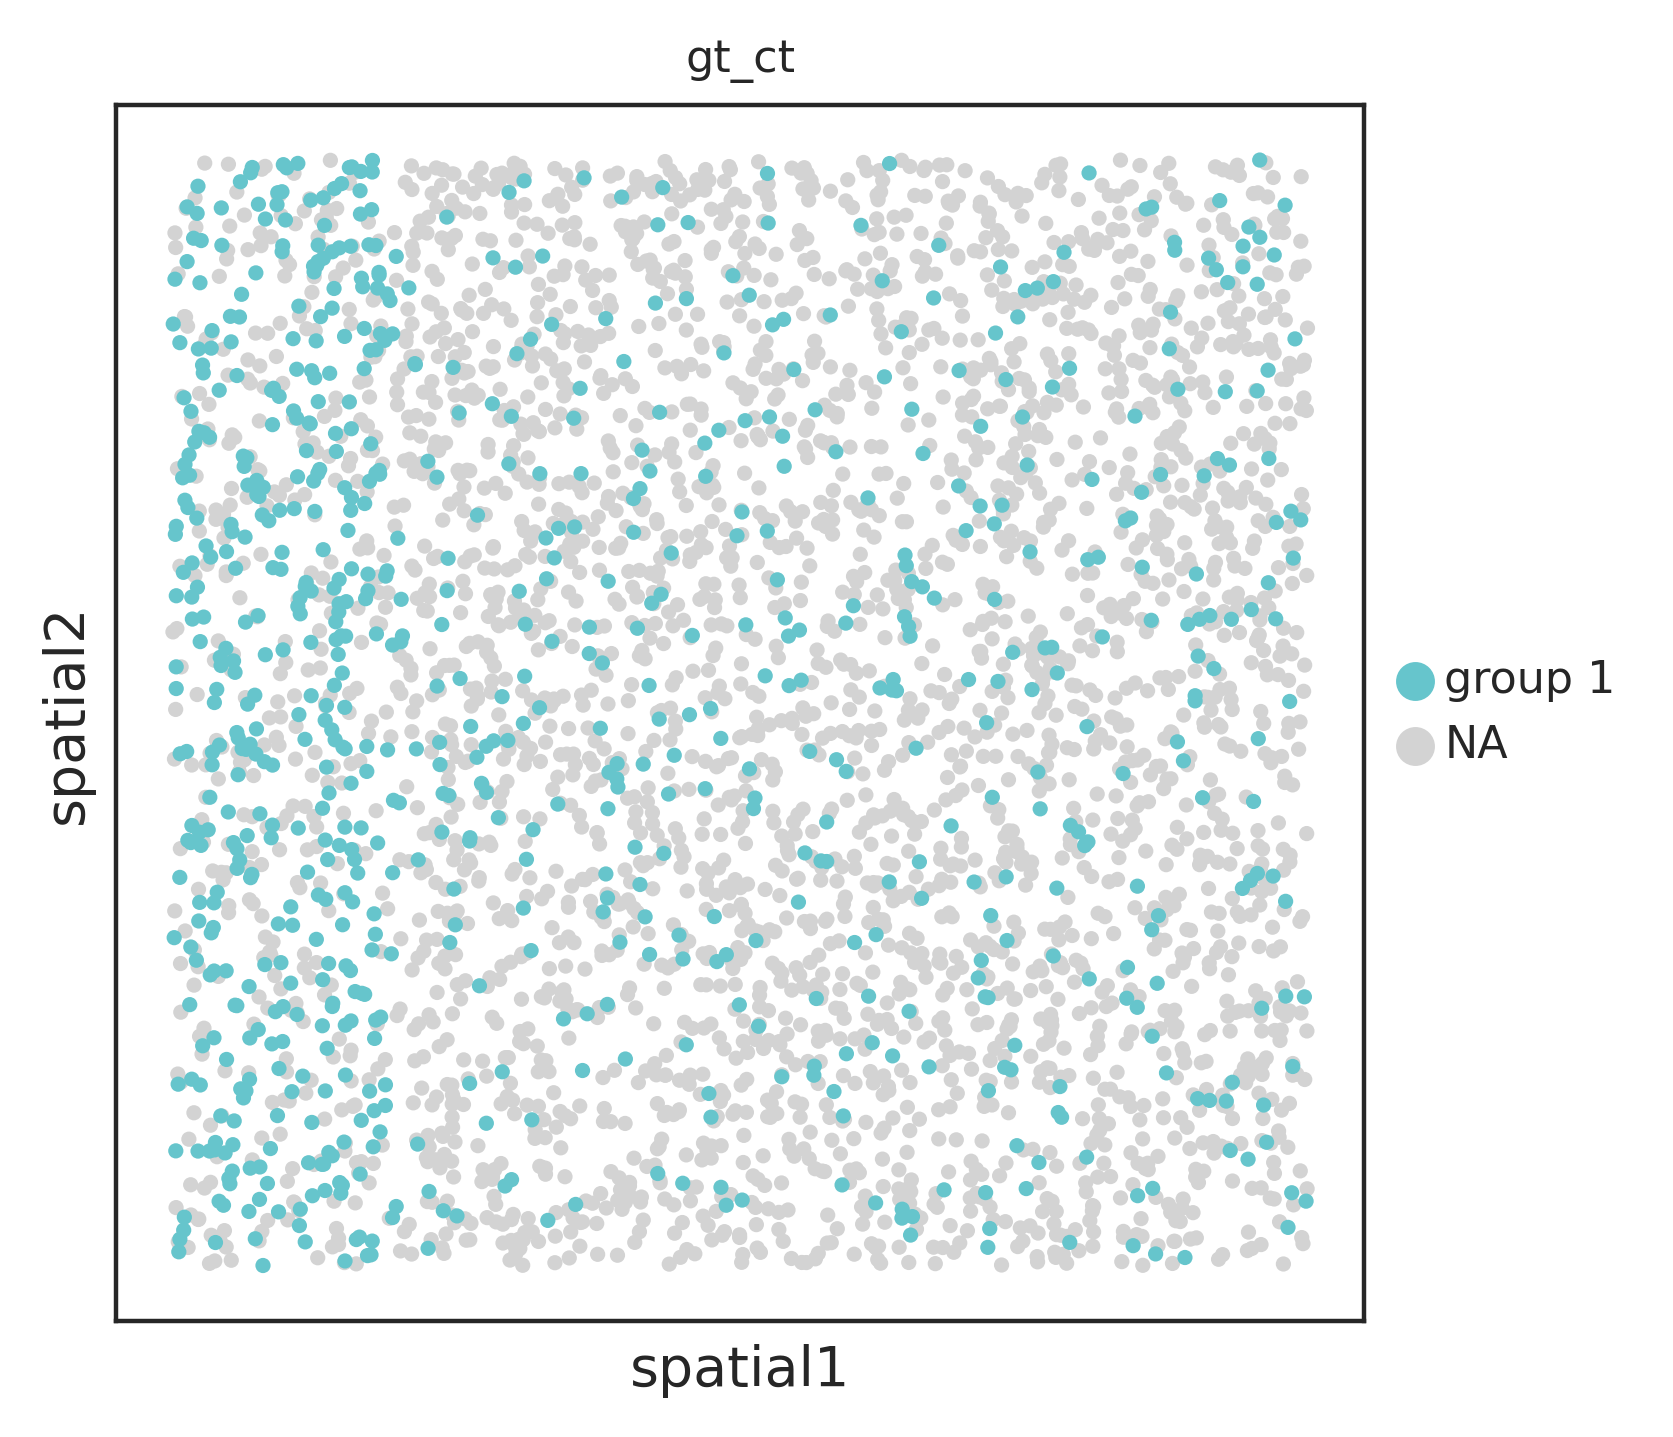

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


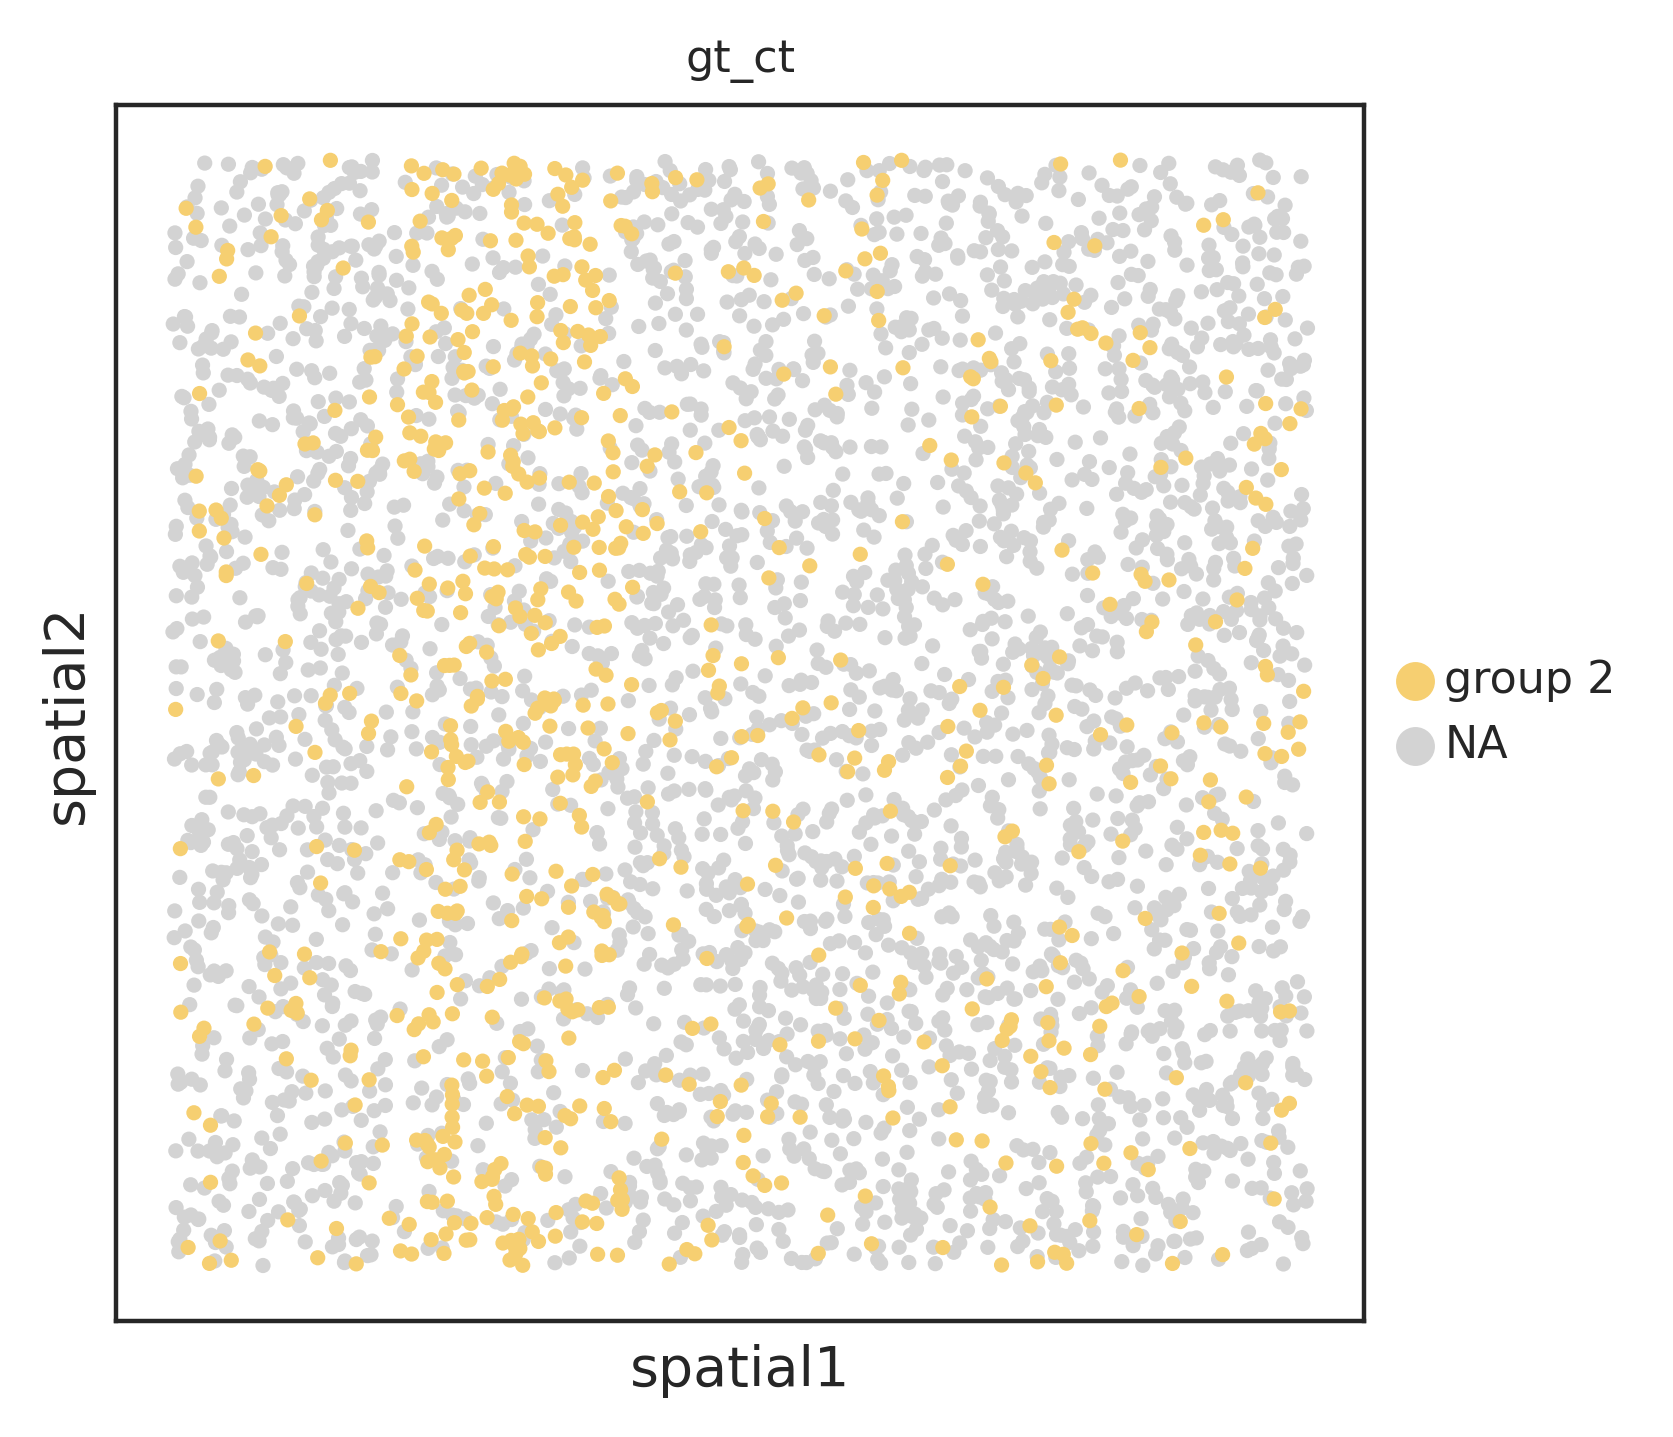

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


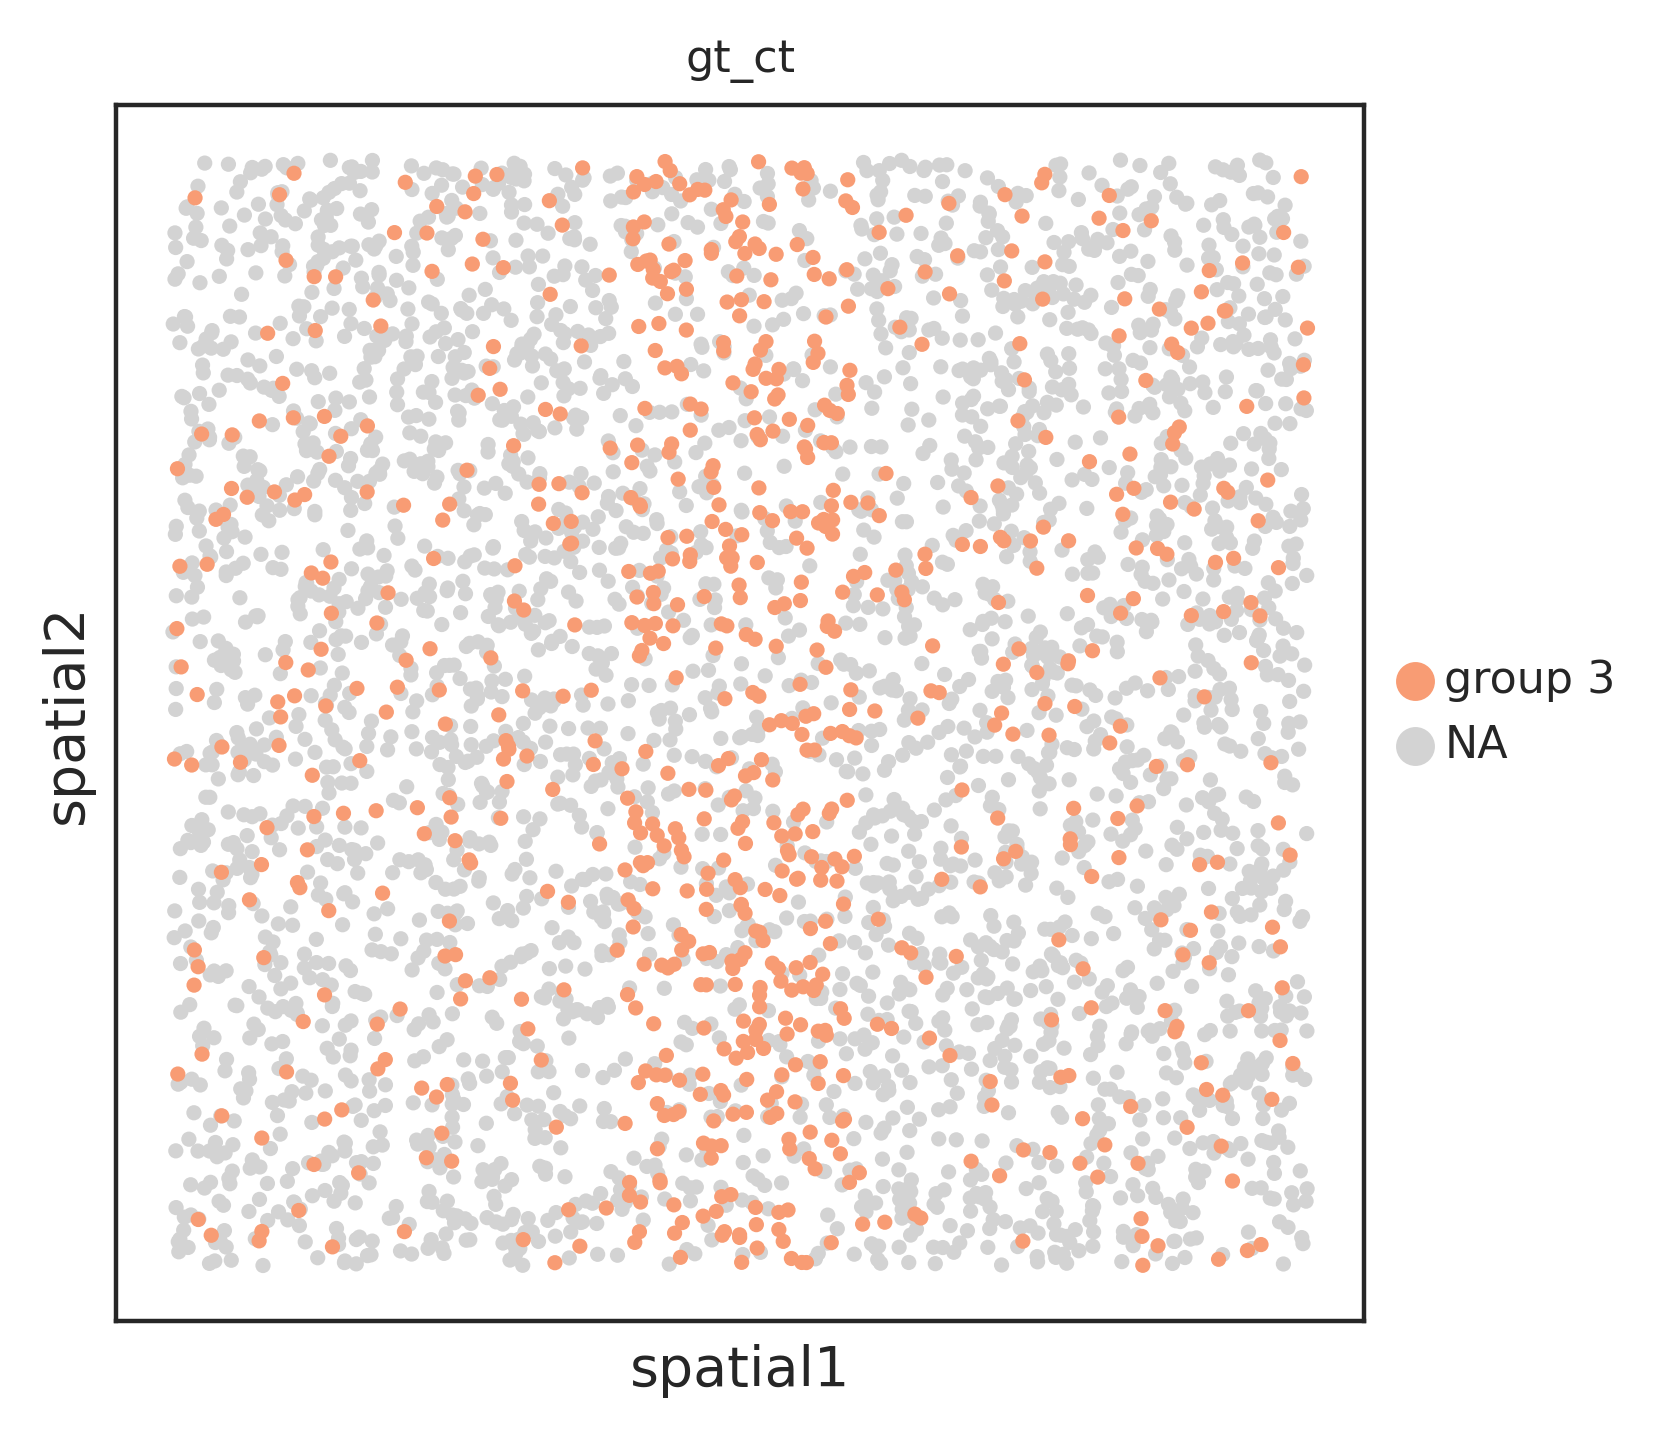

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


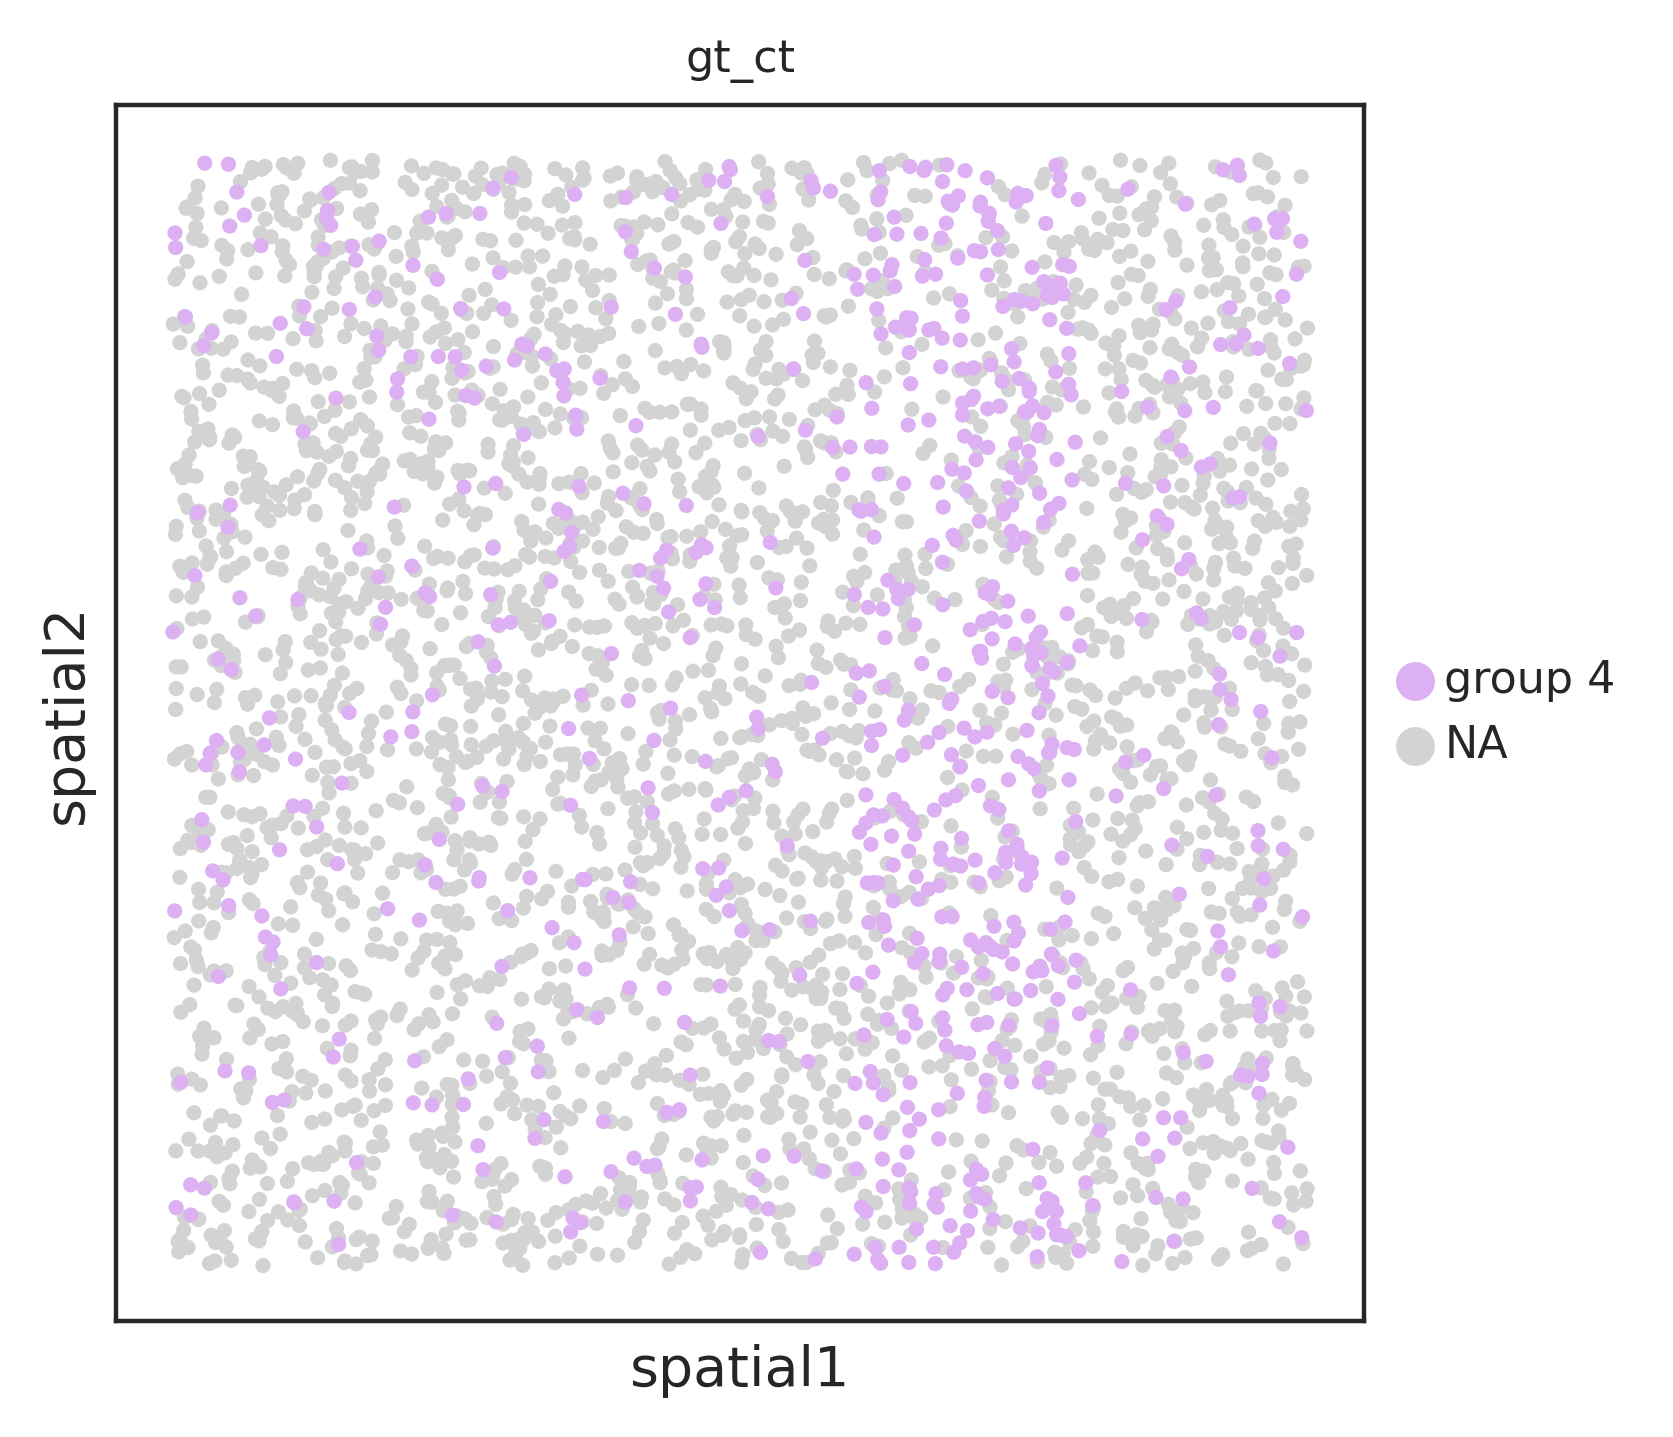

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


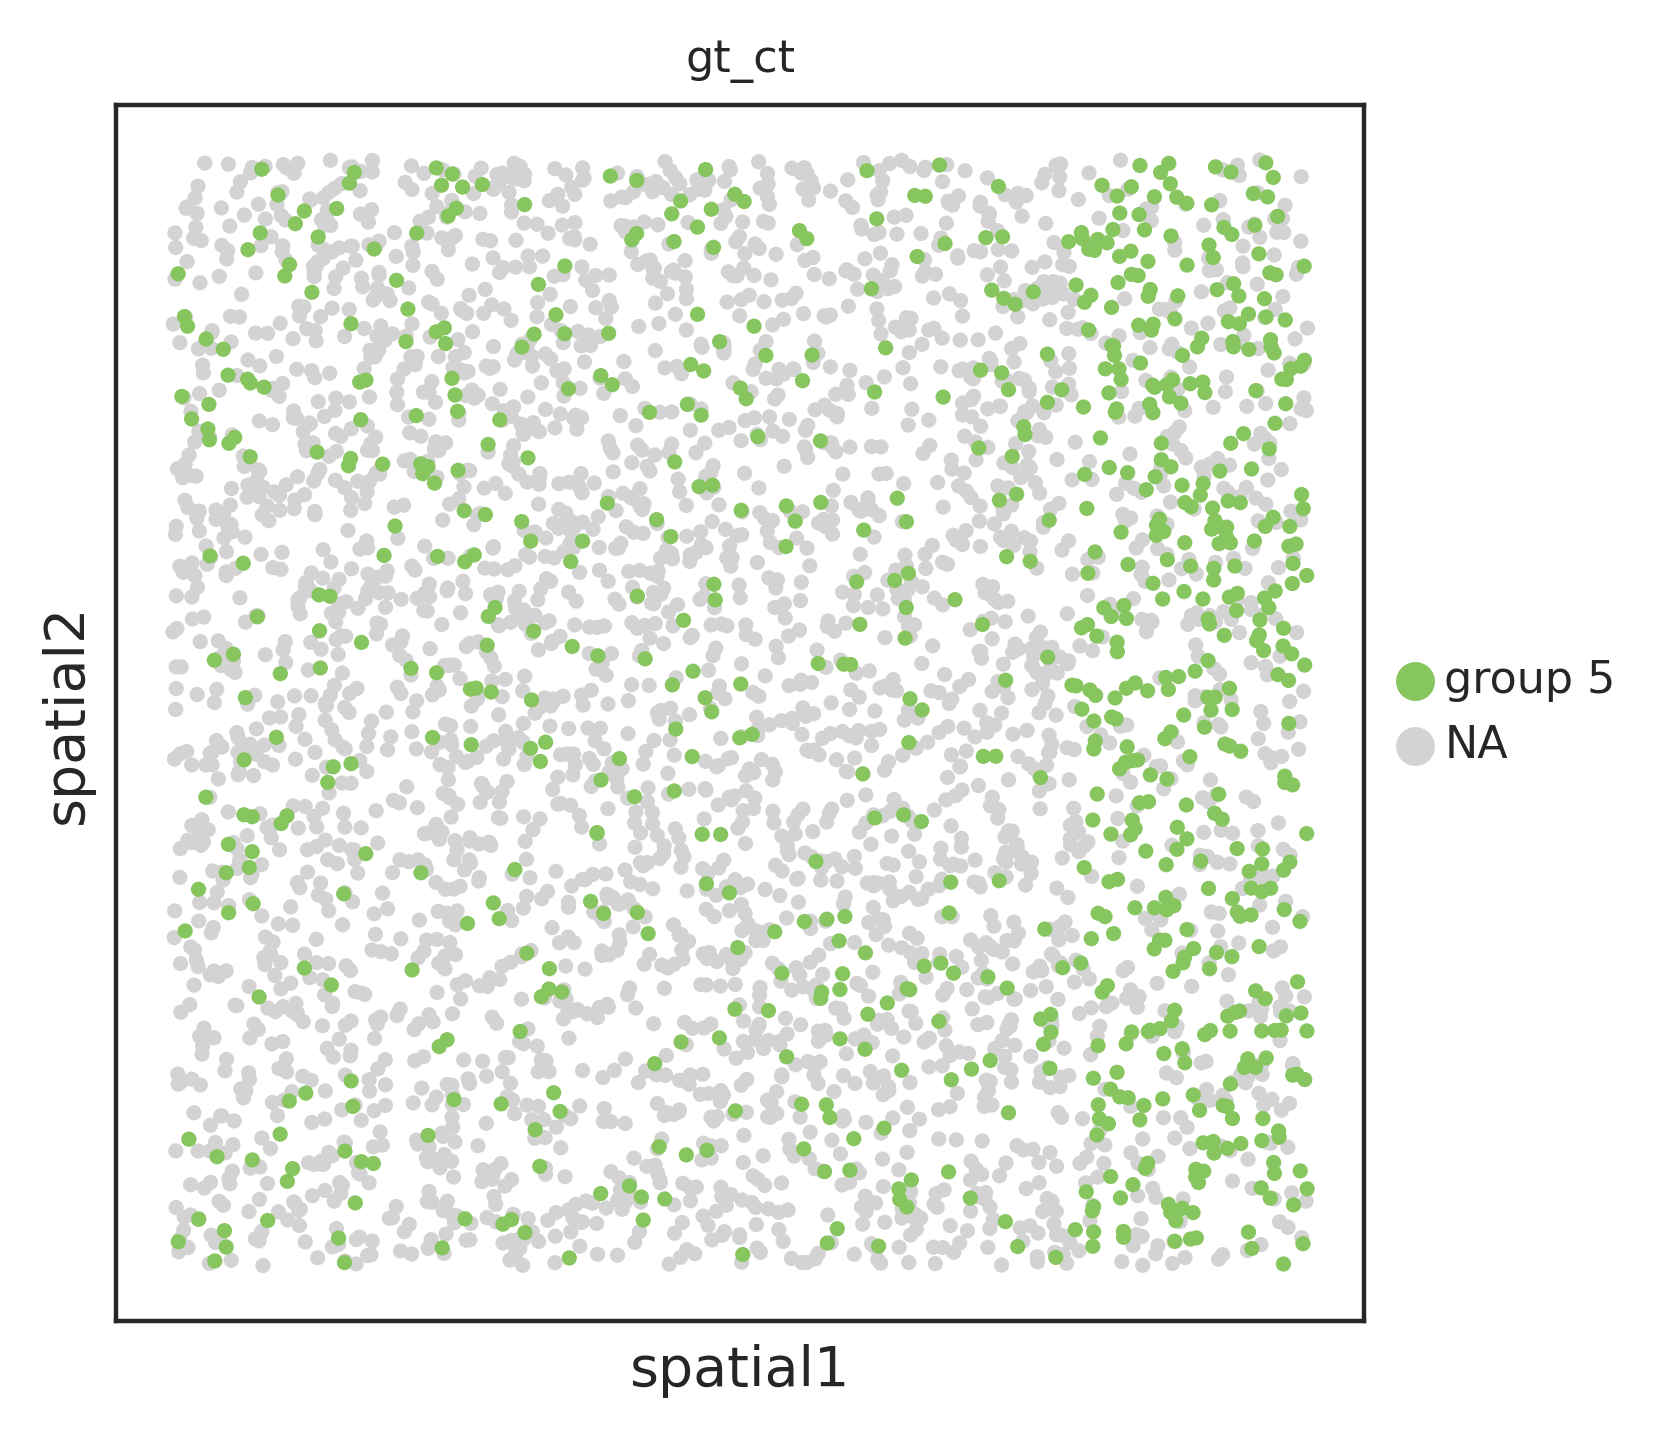

In [18]:
for i in range(5):
    sc.pl.embedding(adata,basis="spatial",color=['gt_ct'],groups='group {0}'.format(i+1))
# plt.gca().set_aspect('equal', adjustable='box') 

In [111]:
# 需要画一个distribution 包含5种颜色

2

In [124]:
adata.obs['gt_ct']

Cell2566-3    group 3
Cell2357-3    group 4
Cell3998-4    group 5
Cell1780-3    group 5
Cell299-3     group 4
               ...   
Cell3973-4    group 5
Cell2801-2    group 4
Cell4310-1    group 5
Cell4969-0    group 1
Cell1584-0    group 3
Name: gt_ct, Length: 3996, dtype: category
Categories (5, object): ['group 1', 'group 2', 'group 3', 'group 4', 'group 5']

In [19]:
pd_dict = {
    'x':[],
    'y':[],
    'region':[],
    'celltype':[]
}
spatial_mat = adata.obsm['spatial']
region_array = adata.obs['region_id']
ct_array = adata.obs['gt_ct']

for i in range(adata.shape[0]):
    cur_x = spatial_mat[i,0]
    cur_y = spatial_mat[i,1]    
    cur_region = region_array[i]
    cur_ct = ct_array[i]
    pd_dict['x'].append(cur_x)
    pd_dict['y'].append(cur_y)    
    pd_dict['region'].append(cur_region)    
    pd_dict['celltype'].append(cur_ct)    
pd_df = pd.DataFrame(pd_dict)

In [20]:
adata.uns['gt_ct_colors']

[(0.4, 0.7725490196078432, 0.8),
 (0.9647058823529412, 0.8117647058823529, 0.44313725490196076),
 (0.9725490196078431, 0.611764705882353, 0.4549019607843137),
 (0.8627450980392157, 0.6901960784313725, 0.9490196078431372),
 (0.5294117647058824, 0.7725490196078432, 0.37254901960784315),
 (0.6196078431372549, 0.7254901960784313, 0.9529411764705882),
 (0.996078431372549, 0.5333333333333333, 0.6941176470588235),
 (0.788235294117647, 0.8588235294117647, 0.4549019607843137),
 (0.5450980392156862, 0.8784313725490196, 0.6431372549019608),
 (0.7058823529411765, 0.592156862745098, 0.9058823529411765)]

[]

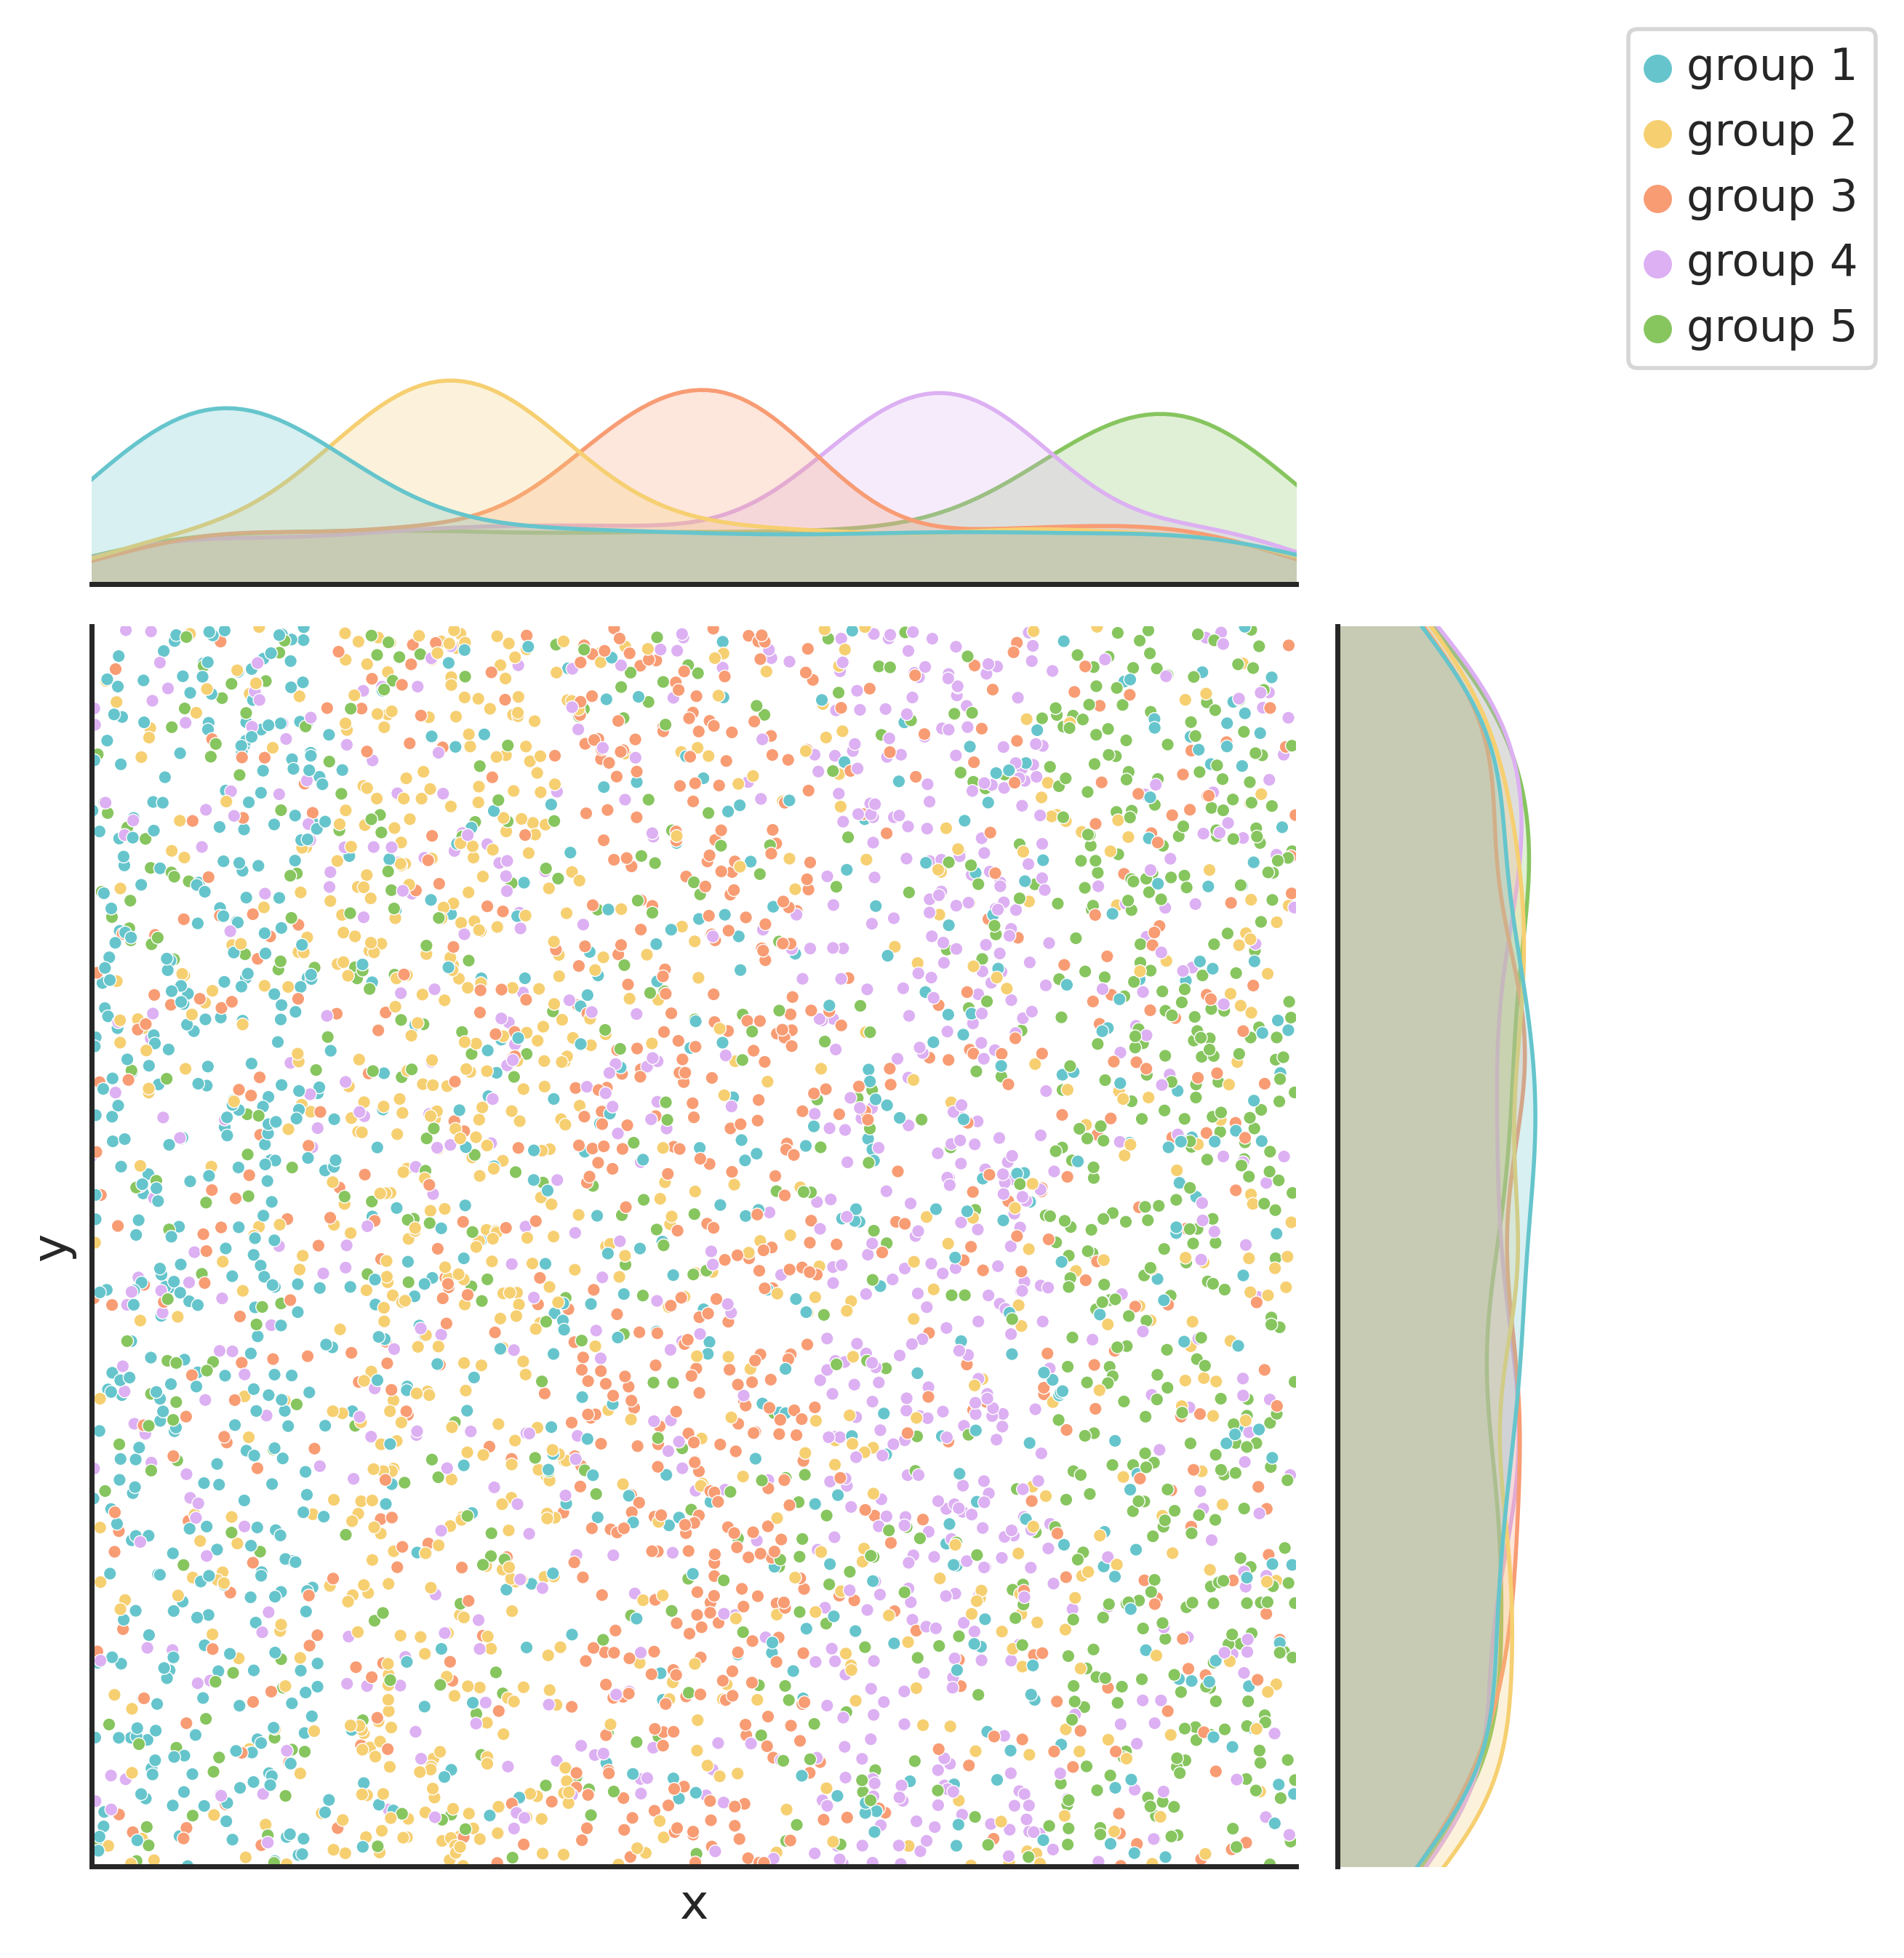

In [25]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the penguins dataset
# penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
# fig,ax = plt.subplots(1,1)
g = sns.jointplot(
    data=pd_df,
    x="x", y="y", hue="celltype",
#     kind="scatter",
#     kind="reg",
    
    # palette=list(adata.uns['gt_ct_colors']),
    palette=cmp[0:5],
    hue_order = np.array(adata.obs['gt_ct'].cat.categories),
    xlim=(0,100),
    ylim=(0,100),
    s=10,
)
# g.get_legend().remove()
g.ax_joint.legend(bbox_to_anchor=(1.5, 1.5))
g.ax_joint.set_xticks([])
g.ax_joint.set_yticks([])

# g.ax_joint
# plt.legend(loc = 'upper right')

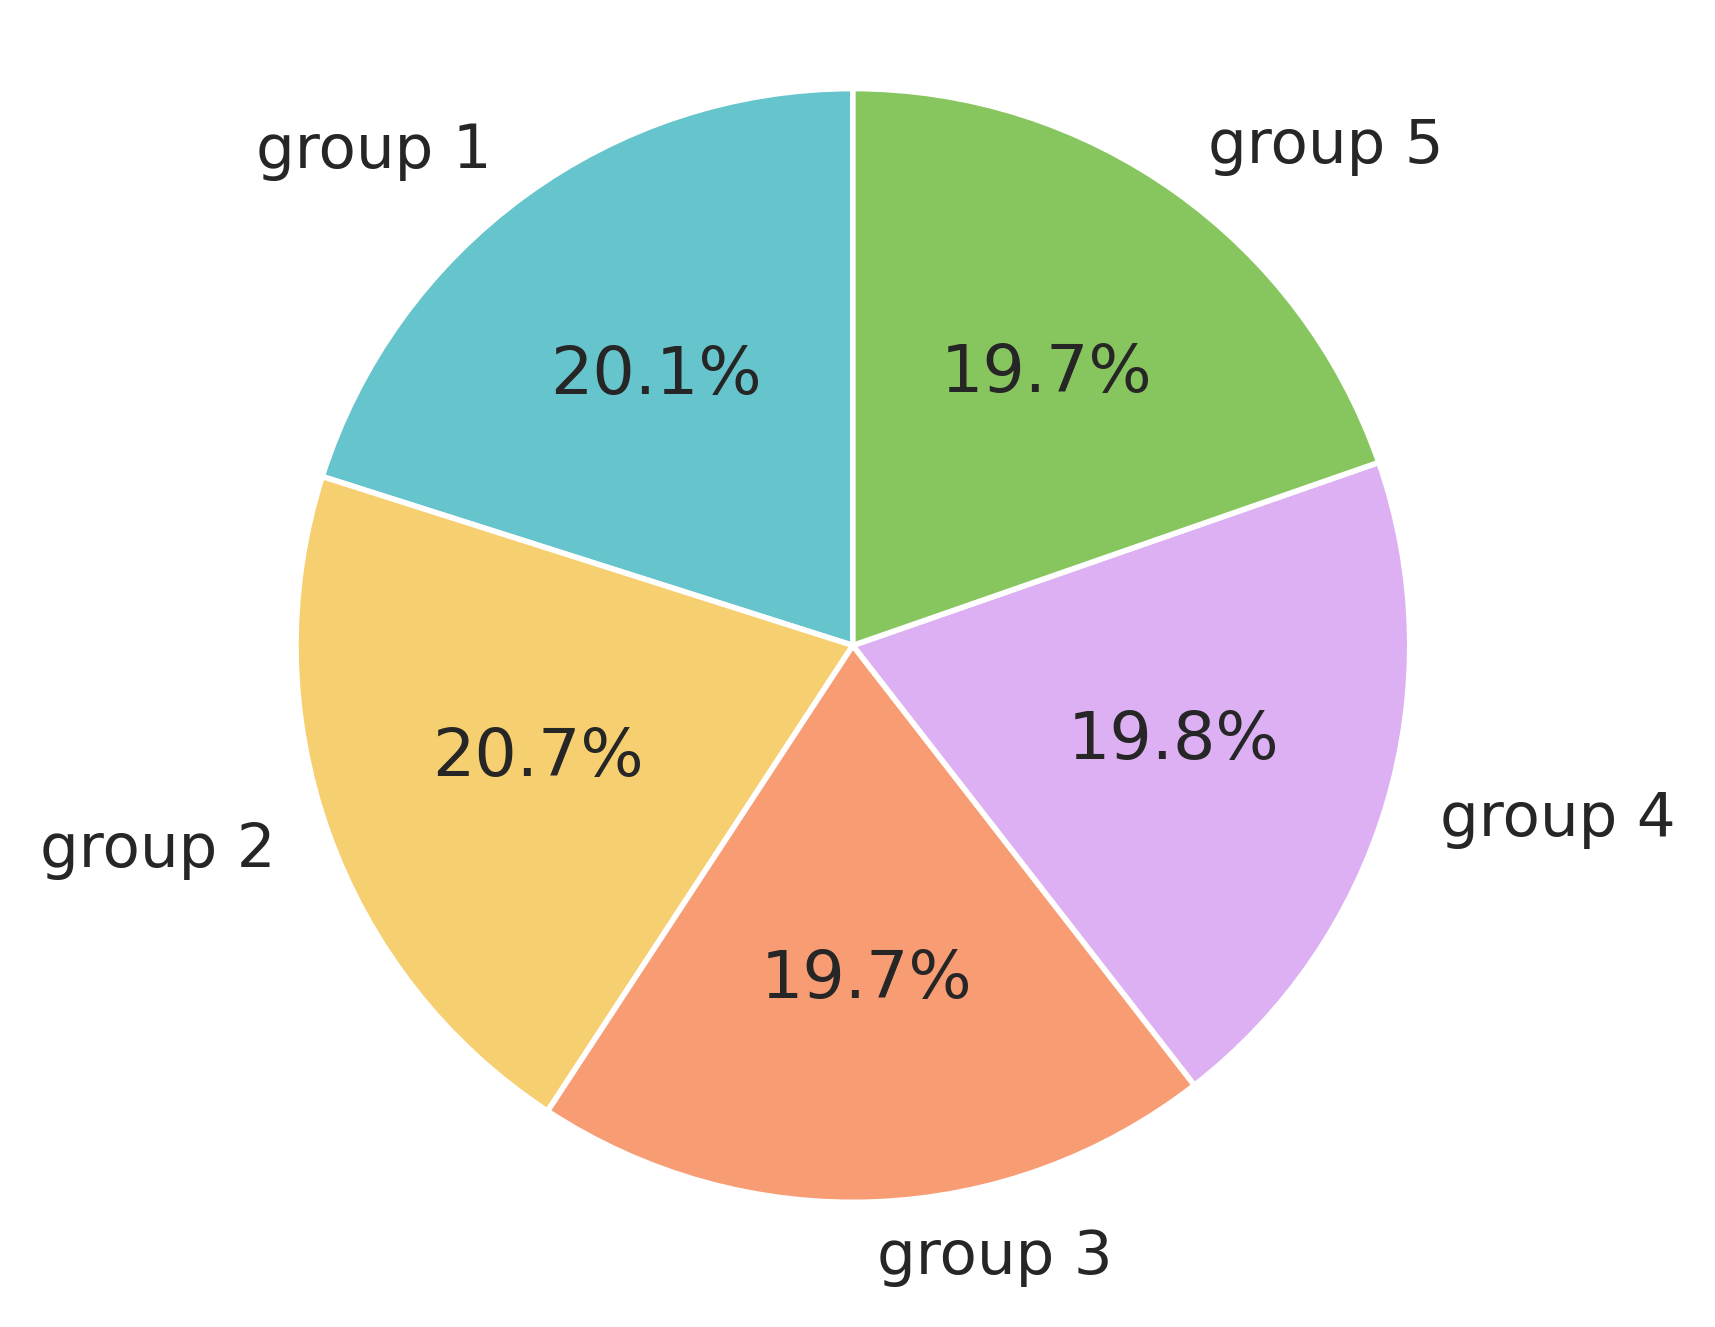

In [29]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = np.unique(adata.obs['gt_ct'],return_counts=1)[0]
sizes = np.unique(adata.obs['gt_ct'],return_counts=1)[1]
# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=adata.uns['gt_ct_colors'],
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()